In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AIFFEL_quest_rs/Exploration/Quest01/
!ls

/content/drive/MyDrive/AIFFEL_quest_rs/Exploration/Quest01
datasets  non_linear.csv  pytoch_3.ipynb  pytoch_5_DatdAug.ipynb  Quest01.ipynb
models	  pytoch_2.ipynb  pytoch_4.ipynb  pytorch_1.ipynb	  README.md


In [3]:
!git pull origin main

From https://github.com/nagujean/AIFFEL_quest_rs
 * branch            main       -> FETCH_HEAD
Already up to date.


In [4]:
!git add .

In [5]:
  !git config --global user.email "nagujean@gmail.com"
  !git config --global user.name "nagujean"

In [6]:
!git commit -m "commit"

[main 427bfac] commit
 3 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 Exploration/Quest01/datasets/Cat_Mario.jpg
 create mode 100644 Exploration/Quest01/datasets/Cat_Mario_1.jpg
 rewrite Exploration/Quest01/pytoch_5_DatdAug.ipynb (82%)


In [7]:
!git push origin main

Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 568.98 KiB | 8.37 MiB/s, done.
Total 8 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/nagujean/AIFFEL_quest_rs.git
   4a72efd..427bfac  main -> main


In [11]:
!pip install numpy requests nlpaug transformers sacremoses nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 29.9 MB/s eta 0:00:00


In [12]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac

texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
#단어 삽입
'''
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
augmented_texts = aug.augment(texts)
'''
#문자 삭제
'''
aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)
'''
#단어 교체

# aug = nac.RandomCharAug(action="swap")
# augmented_texts = aug.augment(texts)


# 단어대체(1)
# aug = naw.SynonymAug(aug_src="wordnet")
# augmented_texts = aug.augment(texts)

#단어대체(2)
'''
reserved_tokens=[
    ["can", "can't", "cannot", "could"]
]
'''

#역번역
back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en',
    device='cpu'
)

#reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = back_translation.augment(texts)



for text, augmented in zip(texts, augmented_texts):
    print("Original:")
    print(text)
    print("Augmented Text:")
    print(augmented)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

NotImplementedError: Cannot copy out of meta tensor; no data! Please use torch.nn.Module.to_empty() instead of torch.nn.Module.to() when moving module from meta to a different device.

In [13]:
!pip install imgaug

In [5]:
from matplotlib import pyplot as plt

In [6]:
from PIL import Image
from torchvision import transforms


transform0 = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        # transforms.RandomRotation(degrees=10, expand=False, center=None),
        # transforms.RandomHorizontalFlip(p=0.5),
        # transforms.RandomVerticalFlip(p=0.5),
        # transforms.RandomCrop(size=(400, 400)),
        # transforms.Pad(padding=50, fill=(127,127,255), padding_mode="constant"),
        # transforms.RandomAffine(
        #     degrees=15, translate=(0.2, 0.2),
        #     scale=(0.8, 1.2), shear=0.1
        # ),
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]
)


# transform1 = transforms.Compose(
#     [
#         transforms.RandomRotation(degrees=10, expand=False, center=None),
#         transforms.RandomHorizontalFlip(p=0.5),
#         transforms.RandomVerticalFlip(p=0.5),

#     ]
# )


image = Image.open("./datasets/Cat_Mario.jpg")
transformed_image = transform0(image)
#transformed_image = transform1(image)
print(transformed_image.shape)

display_image = transformed_image.permute(1, 2, 0).numpy()
plt.imshow(display_image)
# plt.imshow(transformed_image)

FileNotFoundError: [Errno 2] No such file or directory: './datasets/Cat_Mario.jpg'

In [19]:
!pip install imgaug

In [20]:
from imgaug import augmenters as iaa

AttributeError: `np.sctypes` was removed in the NumPy 2.0 release. Access dtypes explicitly instead.

(600, 600, 3) uint8


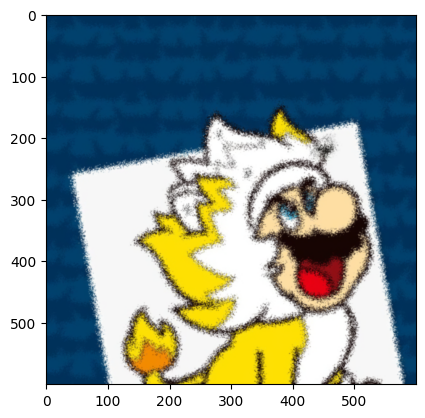

In [44]:
# 노이즈 추가
import numpy as np
np.boll=np.bool_
from PIL import Image
from torchvision import transforms
#from imgaug import augmenters as iaa

import albumentations as A
import matplotlib.pyplot as plt

class AlbumentationsTransforms:
    def __init__(self):
        self.seq = A.Compose([
            # A.ISONoise(p=1), # ISO 노이즈 (예시로 추가)
            # A.GaussNoise(p=1), # 가우시안 노이즈 (예시로 추가)
            # A.RandomRain(p=1), # 비가 내리는 효과 (예시로 추가
            # A.RandomSnow(p=1), # 눈이 내리는 효과 (예시로 추가)
            A.GlassBlur(p=1), # 흐린 효과 (예시로 추가
        ])

    def __call__(self, image):
        # Albumentations는 NumPy 배열(H, W, C)을 입력으로 받습니다.
        images = np.array(image)
        print(images.shape, images.dtype)
        # Albumentations의 augment_image는 딕셔너리를 반환합니다.
        augmented = self.seq(image=images)['image']
        # ToTensorV2가 이미 텐서로 변환하므로 PIL Image로 다시 변환할 필요 없음
        return augmented

transform = transforms.Compose([
    AlbumentationsTransforms()
])

image = Image.open("./datasets/Cat_Mario_1.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)


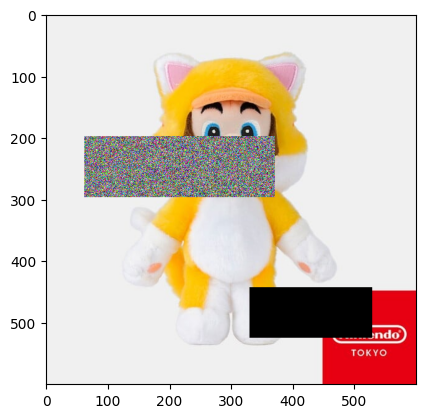

In [23]:
#컷아웃 및 무작위 지우기
from PIL import Image #이미지 가져오기
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
    transforms.RandomErasing(p=1.0, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False),
    transforms.ToPILImage()
])

image = Image.open("./datasets/Cat_Mario.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)


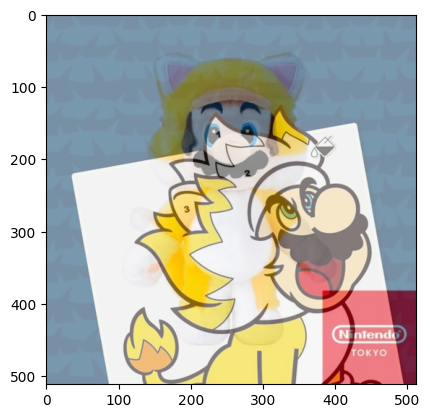

In [34]:
#혼합
from PIL import Image #이미지 가져오기
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

class Mixup:
  def __init__(self, target, scale, alpha=0.5, beta=0.5):
    self.target = target
    self.scale = scale
    self.alpha = alpha
    self.beta = beta

  def __call__(self, image):
      image=np.array(image)
      target=self.target.resize(self.scale)
      target=np.array(target)
      mix_image = image * self.alpha + target * self.beta
      return Image.fromarray(mix_image.astype(np.uint8))

transform = transforms.Compose(
    [
        transforms.Resize((512,512)),
        Mixup(
            target=Image.open("./datasets/Cat_Mario_1.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("./datasets/Cat_Mario.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)



In [ ]:
# 필요한 라이브러리 임포트
import torch # PyTorch 라이브러리
import pandas as pd # 데이터 처리 라이브러리
from torch import nn # 신경망 모듈
from torch import optim # 옵티마이저 모듈
from torch.utils.data import Dataset, DataLoader, random_split # 데이터 유틸리티

# 사용자 정의 데이터셋 클래스 정의
class CustomDataset(Dataset):
    def __init__(self, file_path):
        # CSV 파일 로드 및 특성(x)과 레이블(y) 분리
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.x3 = df.iloc[:, 2].values
        self.y = df.iloc[:, 3].values
        self.length = len(df) # 데이터셋의 총 길이

    def __getitem__(self, index):
        # 특정 인덱스의 데이터와 레이블을 PyTorch 텐서로 반환
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        y = torch.FloatTensor([int(self.y[index])])
        return x, y

    def __len__(self):
        # 데이터셋의 총 길이 반환
        return self.length

# 사용자 정의 모델 클래스 정의
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__() # 부모 클래스 초기화
        # 선형 레이어와 시그모이드 활성화 함수로 구성된 순차적 모델 정의
        self.layer1 = nn.Sequential(
            nn.Linear(3, 8), # 입력 3개, 출력 1개인 선형 레이어
            nn.BatchNorm1d(8), # 배치 정규화
            nn.ReLU(),     #  활성화 함수
            nn.Dropout(0.2)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(8, 1), # 입력 3개, 출력 1개인 선형 레이어
            nn.Sigmoid()     # 0과 1 사이의 값으로 변환하는 시그모이드 활성화 함수
        )
        #print(self.layer1[0].weight)

        self._init_weights()
    def _init_weights(self):
        nn.init.xavier_uniform_(self.layer1[0].weight)
        self.layer1[0].bias.data.fill_(0.01)

        nn.init.xavier_uniform_(self.layer2[0].weight)
        self.layer2[0].bias.data.fill_(0.01)

        # --- 선택 사항: 가중치 초기화 ---
        # for m in self.modules():
        #     if isinstance(m, nn.Linear):
        #         nn.init.xavier_uniform_(m.weight) # Sigmoid 활성화 함수에 적합
        #         if m.bias is not None:
        #             nn.init.constant_(m.bias, 0)

       # print(self.layer1[0].weight)


    def forward(self, x):
        # 모델의 순전파 로직 정의
        x = self.layer1(x)
        x = self.layer2(x)
       # print(x)
        return x


# 데이터셋 로드, 분할 및 데이터로더 생성
dataset = CustomDataset("./datasets/binary.csv") # CustomDataset 객체 생성 (데이터 파일 경로 지정)
dataset_size = len(dataset)                       # 전체 데이터셋 크기
train_size = int(dataset_size * 0.8)              # 훈련 세트 크기 (80%)
validation_size = int(dataset_size * 0.1)         # 검증 세트 크기 (10%)
test_size = dataset_size - train_size - validation_size # 테스트 세트 크기 (나머지)

# 데이터셋을 훈련, 검증, 테스트 세트로 무작위 분할 (재현성을 위해 시드 고정)
train_dataset, validation_dataset, test_dataset = random_split(
    dataset, [train_size, validation_size, test_size], torch.manual_seed(4)
)

# DataLoader를 사용하여 각 데이터셋을 미니 배치 단위로 준비
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

# GPU 연산 적용 및 모델 설정
device = "cuda" if torch.cuda.is_available() else "cpu" # GPU(CUDA) 사용 가능 여부 확인 후 디바이스 설정
model = CustomModel().to(device)                       # CustomModel 인스턴스 생성 및 디바이스로 이동
criterion = nn.BCELoss().to(device)                    # 이진 교차 엔트로피 손실 함수 정의 및 디바이스로 이동
optimizer = optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.01)   # SGD 옵티마이저 정의 (모델 파라미터와 학습률 지정)


In [ ]:

# 모델 학습 진행 (Training Loop)
for epoch in range(1000): # 총 10,000 에포크 동안 학습 반복
    cost = 0.0 # 현재 에포크의 누적 손실 초기화

    for x, y in train_dataloader: # 훈련 데이터로더에서 배치 단위로 데이터 가져오기
        x = x.to(device) # 입력 데이터를 디바이스로 이동
        y = y.to(device) # 레이블 데이터를 디바이스로 이동

        output = model(x) # 순전파: 모델을 통해 예측값 계산
        # _lambda = 0.001
        # l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = criterion(output, y) # + _lambda * l2_loss # 손실 계산: 예측값과 실제값 비교

        optimizer.zero_grad() # 이전 경사값 초기화
        loss.backward()       # 역전파: 손실에 대한 경사 계산

        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1) #그레디언트 클리핑


        optimizer.step()      # 파라미터 업데이트: 계산된 경사를 이용해 모델 가중치 조정

        cost += loss # 현재 배치 손실을 누적

    cost = cost / len(train_dataloader) # 에포크의 평균 손실 계산

    if (epoch + 1) % 100 == 0: # 1000 에포크마다 진행 상황 출력
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch :  100, Model : [Parameter containing:
tensor([[-0.3970,  0.3272,  0.4517],
        [-0.1706,  0.6421, -0.3054],
        [ 0.3552,  0.4558,  0.2605],
        [-0.2829, -0.3986, -0.2773],
        [ 0.4648, -0.2465, -0.4104],
        [ 0.4989,  0.3727,  0.3055],
        [-0.7150, -0.0527, -0.5851],
        [ 0.1793,  0.3559, -0.4534]], requires_grad=True), Parameter containing:
tensor([0.0099, 0.0099, 0.0099, 0.0099, 0.0099, 0.0099, 0.0099, 0.0099],
       requires_grad=True), Parameter containing:
tensor([0.9744, 0.9276, 0.8969, 0.8812, 1.0068, 1.0855, 1.0790, 0.9169],
       requires_grad=True), Parameter containing:
tensor([-0.0042, -0.0305, -0.1027, -0.1021,  0.0044,  0.1093,  0.0833, -0.0386],
       requires_grad=True), Parameter containing:
tensor([[ 0.2517,  0.3245, -0.4539,  0.2675, -0.5083,  0.7948, -0.4957,  0.3717]],
       requires_grad=True), Parameter containing:
tensor([-0.0716], requires_grad=True)], Cost : 0.568
Epoch :  200, Model : [Parameter containing:
tensor(

In [ ]:
# 필요한 라이브러리 임포트
import torch # PyTorch 라이브러리
import pandas as pd # 데이터 처리 라이브러리
from torch import nn # 신경망 모듈
from torch import optim # 옵티마이저 모듈
from torch.utils.data import Dataset, DataLoader, random_split # 데이터 유틸리티

# 사용자 정의 데이터셋 클래스 정의
class CustomDataset(Dataset):
    def __init__(self, file_path):
        # CSV 파일 로드 및 특성(x)과 레이블(y) 분리
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.x3 = df.iloc[:, 2].values
        self.y = df.iloc[:, 3].values
        self.length = len(df) # 데이터셋의 총 길이

    def __getitem__(self, index):
        # 특정 인덱스의 데이터와 레이블을 PyTorch 텐서로 반환
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        y = torch.FloatTensor([int(self.y[index])])
        return x, y

    def __len__(self):
        # 데이터셋의 총 길이 반환
        return self.length

# 사용자 정의 모델 클래스 정의
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__() # 부모 클래스 초기화
        # 선형 레이어와 시그모이드 활성화 함수로 구성된 순차적 모델 정의
        self.layer = nn.Sequential(
            nn.Linear(3, 1), # 입력 3개, 출력 1개인 선형 레이어
            nn.Sigmoid()     # 0과 1 사이의 값으로 변환하는 시그모이드 활성화 함수
        )

    def forward(self, x):
        # 모델의 순전파 로직 정의
        x = self.layer(x)
        return x

# 데이터셋 로드, 분할 및 데이터로더 생성
dataset = CustomDataset("./datasets/binary.csv") # CustomDataset 객체 생성 (데이터 파일 경로 지정)
dataset_size = len(dataset)                       # 전체 데이터셋 크기
train_size = int(dataset_size * 0.8)              # 훈련 세트 크기 (80%)
validation_size = int(dataset_size * 0.1)         # 검증 세트 크기 (10%)
test_size = dataset_size - train_size - validation_size # 테스트 세트 크기 (나머지)

# 데이터셋을 훈련, 검증, 테스트 세트로 무작위 분할 (재현성을 위해 시드 고정)
train_dataset, validation_dataset, test_dataset = random_split(
    dataset, [train_size, validation_size, test_size], torch.manual_seed(4)
)

# DataLoader를 사용하여 각 데이터셋을 미니 배치 단위로 준비
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

# GPU 연산 적용 및 모델 설정
device = "cuda" if torch.cuda.is_available() else "cpu" # GPU(CUDA) 사용 가능 여부 확인 후 디바이스 설정
model = CustomModel().to(device)                       # CustomModel 인스턴스 생성 및 디바이스로 이동
criterion = nn.BCELoss().to(device)                    # 이진 교차 엔트로피 손실 함수 정의 및 디바이스로 이동
optimizer = optim.SGD(model.parameters(), lr=0.0001)   # SGD 옵티마이저 정의 (모델 파라미터와 학습률 지정)

# 모델 학습 진행 (Training Loop)
for epoch in range(10000): # 총 10,000 에포크 동안 학습 반복
    cost = 0.0 # 현재 에포크의 누적 손실 초기화

    for x, y in train_dataloader: # 훈련 데이터로더에서 배치 단위로 데이터 가져오기
        x = x.to(device) # 입력 데이터를 디바이스로 이동
        y = y.to(device) # 레이블 데이터를 디바이스로 이동

        output = model(x) # 순전파: 모델을 통해 예측값 계산
        loss = criterion(output, y) # 손실 계산: 예측값과 실제값 비교

        optimizer.zero_grad() # 이전 경사값 초기화
        loss.backward()       # 역전파: 손실에 대한 경사 계산
        optimizer.step()      # 파라미터 업데이트: 계산된 경사를 이용해 모델 가중치 조정

        cost += loss # 현재 배치 손실을 누적

    cost = cost / len(train_dataloader) # 에포크의 평균 손실 계산

    if (epoch + 1) % 1000 == 0: # 1000 에포크마다 진행 상황 출력
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

# 모델 평가
with torch.no_grad(): # 평가 시 경사 계산 비활성화
    model.eval()     # 모델을 평가 모드로 전환 (Dropout, BatchNorm 등 영향)
    for x, y in validation_dataloader: # 검증 데이터로더에서 배치 가져오기
        x = x.to(device) # 입력 데이터를 디바이스로 이동
        y = y.to(device) # 레이블 데이터를 디바이스로 이동

        outputs = model(x) # 모델의 예측값 계산

        print(outputs) # 원본 예측 확률 출력
        # 0.5를 기준으로 이진 분류 결과 출력 (True/False)
        print(outputs >= torch.FloatTensor([0.5]).to(device))
        print("--------------------") # 배치 구분선

# 모델 저장
# 전체 모델 저장 (환경 종속성 있음, 개발/테스트용)
torch.save(
    model,
    "models/250719_model.pt"
)

# 모델의 state_dict (파라미터만) 저장 (권장되는 방법, 유연성 높음)
torch.save(
    model.state_dict(),
    "models/250719_model_state_dict"
)

Epoch : 1000, Model : [Parameter containing:
tensor([[ 0.0028, -0.0006,  0.0036]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0949], device='cuda:0', requires_grad=True)], Cost : 0.680
Epoch : 2000, Model : [Parameter containing:
tensor([[0.0034, 0.0005, 0.0041]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0346], device='cuda:0', requires_grad=True)], Cost : 0.666
Epoch : 3000, Model : [Parameter containing:
tensor([[0.0045, 0.0017, 0.0051]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.1609], device='cuda:0', requires_grad=True)], Cost : 0.652
Epoch : 4000, Model : [Parameter containing:
tensor([[0.0052, 0.0017, 0.0053]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2843], device='cuda:0', requires_grad=True)], Cost : 0.636
Epoch : 5000, Model : [Parameter containing:
tensor([[0.0059, 0.0036, 0.0064]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.4046], 

RuntimeError: Parent directory .models does not exist.

In [ ]:
import os
import torch

'''
# 모델 저장
# 전체 모델 저장 (환경 종속성 있음, 개발/테스트용)
torch.save(
    model,
    "models/250719_model.pt"
)
'''

# 모델의 state_dict (파라미터만) 저장 (권장되는 방법, 유연성 높음)
torch.save(
    model.state_dict(),
    "models/250719_model_state_dict"
)